In [1]:
from google.colab import files

uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!pip install kaggle

In [3]:
!kaggle competitions download -c farm-connect-soil-water-content-prediction

  0% 0.00/41.3k [00:00<?, ?B/s]
100% 41.3k/41.3k [00:00<00:00, 28.3MB/s]


In [4]:
!unzip farm-connect-soil-water-content-prediction.zip

Archive:  farm-connect-soil-water-content-prediction.zip
  inflating: baseline.ipynb          
  inflating: sample_submission.csv   
  inflating: sensors_info.csv        
  inflating: test/test/set02.csv     
  inflating: test/test/set09.csv     
  inflating: train/train/set01.csv   
  inflating: train/train/set03.csv   
  inflating: train/train/set04.csv   
  inflating: train/train/set05.csv   
  inflating: train/train/set06.csv   
  inflating: train/train/set07.csv   
  inflating: train/train/set08.csv   
  inflating: train/train/set10.csv   
  inflating: train/train/set11.csv   
  inflating: train/train/set12.csv   


# Read Data

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [261]:
df_train01 = pd.read_csv('/content/train/train/set01.csv')
df_train03 = pd.read_csv('/content/train/train/set03.csv')
df_train04 = pd.read_csv('/content/train/train/set04.csv')
df_train05 = pd.read_csv('/content/train/train/set05.csv')
df_train06 = pd.read_csv('/content/train/train/set06.csv')
df_train07 = pd.read_csv('/content/train/train/set07.csv')
df_train08 = pd.read_csv('/content/train/train/set08.csv')
df_train10 = pd.read_csv('/content/train/train/set10.csv')
df_train11 = pd.read_csv('/content/train/train/set11.csv')
df_train12 = pd.read_csv('/content/train/train/set12.csv')
df_train01

,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,01_1,01:00:50.174233+00,97.3,21.8,0.00,9.57,0.0,0.0,0.0,6.0,31.4,23.6,0.11,8.3,21.0,95.0,87.0,23.0,0.0
1,01_2,01:02:51.384714+00,96.6,22.0,0.00,9.81,0.0,0.0,0.0,6.0,31.9,23.6,0.11,8.3,21.0,95.0,87.0,22.0,0.0
2,01_3,01:04:52.127056+00,95.9,22.2,0.00,10.22,0.0,0.0,0.0,5.0,32.4,23.6,0.11,8.3,21.0,95.0,87.0,NaN,0.0
3,01_4,01:06:50.205974+00,95.3,22.4,0.00,10.25,0.0,0.0,0.0,6.0,32.4,23.6,0.11,8.3,21.0,95.0,87.0,22.0,0.0
4,01_5,01:08:50.162332+00,93.8,22.4,0.00,10.45,0.0,0.0,0.0,6.0,31.7,23.6,0.11,8.3,21.0,95.0,87.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,01_114,04:48:52.349737+00,42.1,35.5,65.53,10.39,0.0,0.0,0.0,2.0,37.4,23.4,0.11,8.1,23.0,99.0,92.0,NaN,0.0
114,01_115,04:50:50.387249+00,45.5,33.8,65.53,10.79,0.0,0.0,0.9,3.0,36.9,23.4,0.11,8.2,23.0,99.0,92.0,19.0,0.0
115,01_116,04:52:50.403053+00,42.5,35.0,65.53,12.07,0.0,0.0,0.5,2.0,36.9,23.5,0.11,8.2,23.0,99.0,92.0,18.0,0.0
116,01_117,04:54:50.390263+00,41.9,35.1,0.00,59.53,0.0,0.0,0.6,4.0,36.9,23.5,0.11,8.1,23.0,99.0,92.0,19.0,0.0


In [262]:
df_train = [df_train01, df_train03, df_train04, df_train05, df_train07, df_train08, df_train10, df_train11, df_train12]
df_train = pd.concat(df_train, ignore_index=True)
df_train = df_train.drop(['index'], axis=1)
df_train = df_train.drop(['time'], axis=1)
df_train

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,97.3,21.8,0.0,9.57,0.0,0.0,0.0,6.0,31.4,23.6,0.11,8.3,21.0,95.0,87.0,23.0,0.0
1,96.6,22.0,0.0,9.81,0.0,0.0,0.0,6.0,31.9,23.6,0.11,8.3,21.0,95.0,87.0,22.0,0.0
2,95.9,22.2,0.0,10.22,0.0,0.0,0.0,5.0,32.4,23.6,0.11,8.3,21.0,95.0,87.0,NaN,0.0
3,95.3,22.4,0.0,10.25,0.0,0.0,0.0,6.0,32.4,23.6,0.11,8.3,21.0,95.0,87.0,22.0,0.0
4,93.8,22.4,0.0,10.45,0.0,0.0,0.0,6.0,31.7,23.6,0.11,8.3,21.0,95.0,87.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,43.0,33.0,0.0,52.30,0.0,0.0,1.0,5.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,109.0,0.0
988,42.5,32.5,0.0,53.76,0.0,0.0,0.8,4.0,37.4,22.8,0.11,5.0,21.0,95.0,87.0,NaN,0.0
989,41.7,33.1,0.0,54.86,0.0,0.0,0.8,4.0,37.4,22.8,0.11,5.1,21.0,95.0,87.0,109.0,0.0
990,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,104.0,0.0


In [263]:
df_test02 = pd.read_csv('/content/test/test/set02.csv')
df_test09 = pd.read_csv('/content/test/test/set09.csv')
df_test02

,index,time,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,02_1,04:11:15.736838+00,46.2,30.7,65.53,8.79,0.0,0.0,1.3,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
1,02_2,04:13:15.740386+00,46.0,31.4,65.53,8.26,0.0,0.0,0.0,1.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
2,02_3,04:15:17.720768+00,44.4,32.2,65.53,8.66,0.0,0.0,1.0,2.0,22.3,0.11,7.9,21.0,95.0,88.0,NaN,0.0
3,02_4,04:17:15.750584+00,43.0,33.0,65.53,8.68,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
4,02_5,04:19:15.75123+00,42.4,32.9,65.53,8.86,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,02_109,07:59:37.207608+00,41.8,32.4,0.00,61.43,0.0,0.0,0.8,1.0,22.3,0.11,7.8,22.0,97.0,90.0,NaN,0.0
109,02_110,08:01:35.249138+00,42.9,31.8,0.00,60.58,0.0,0.0,0.5,0.0,22.3,0.11,7.8,22.0,97.0,90.0,20.0,0.0
110,02_111,08:03:35.258302+00,40.9,33.1,0.00,60.55,0.0,0.0,1.2,0.0,22.3,0.11,7.8,22.0,97.0,90.0,20.0,0.0
111,02_112,08:05:35.272112+00,42.6,32.6,0.00,60.16,0.0,0.0,0.2,2.0,22.4,0.11,7.8,22.0,97.0,90.0,20.0,0.0


In [264]:
df_test = [df_test02, df_test09]
df_test = pd.concat(df_test, ignore_index=True)
df_test = df_test.drop(['index'], axis=1)
df_test = df_test.drop(['time'], axis=1)
df_test

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,46.2,30.7,65.53,8.79,0.0,0.0,1.3,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
1,46.0,31.4,65.53,8.26,0.0,0.0,0.0,1.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
2,44.4,32.2,65.53,8.66,0.0,0.0,1.0,2.0,22.3,0.11,7.9,21.0,95.0,88.0,NaN,0.0
3,43.0,33.0,65.53,8.68,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
4,42.4,32.9,65.53,8.86,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,36.2,35.9,0.00,53.35,0.0,0.0,0.0,3.0,23.7,0.12,4.9,27.0,110.0,103.0,48.0,0.0
225,39.8,35.9,0.00,54.13,0.0,0.0,1.9,0.0,23.7,0.12,4.9,27.0,110.0,103.0,NaN,0.0
226,38.4,35.8,0.00,54.11,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,48.0,0.0
227,38.2,35.6,0.00,54.26,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,45.0,0.0


# Data Understanding

## Data Visualization

In [265]:
def plot_distribution(df):
    num_plots = len(df.columns)
    num_rows = (num_plots + 2) // 4
    fig, axes = plt.subplots(num_rows, 4, figsize=(15, 5 * num_rows))
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    for i, col in enumerate(df.columns):
        row_idx = i // 4
        col_idx = i % 4
        sns.histplot(df[col], kde=True, ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

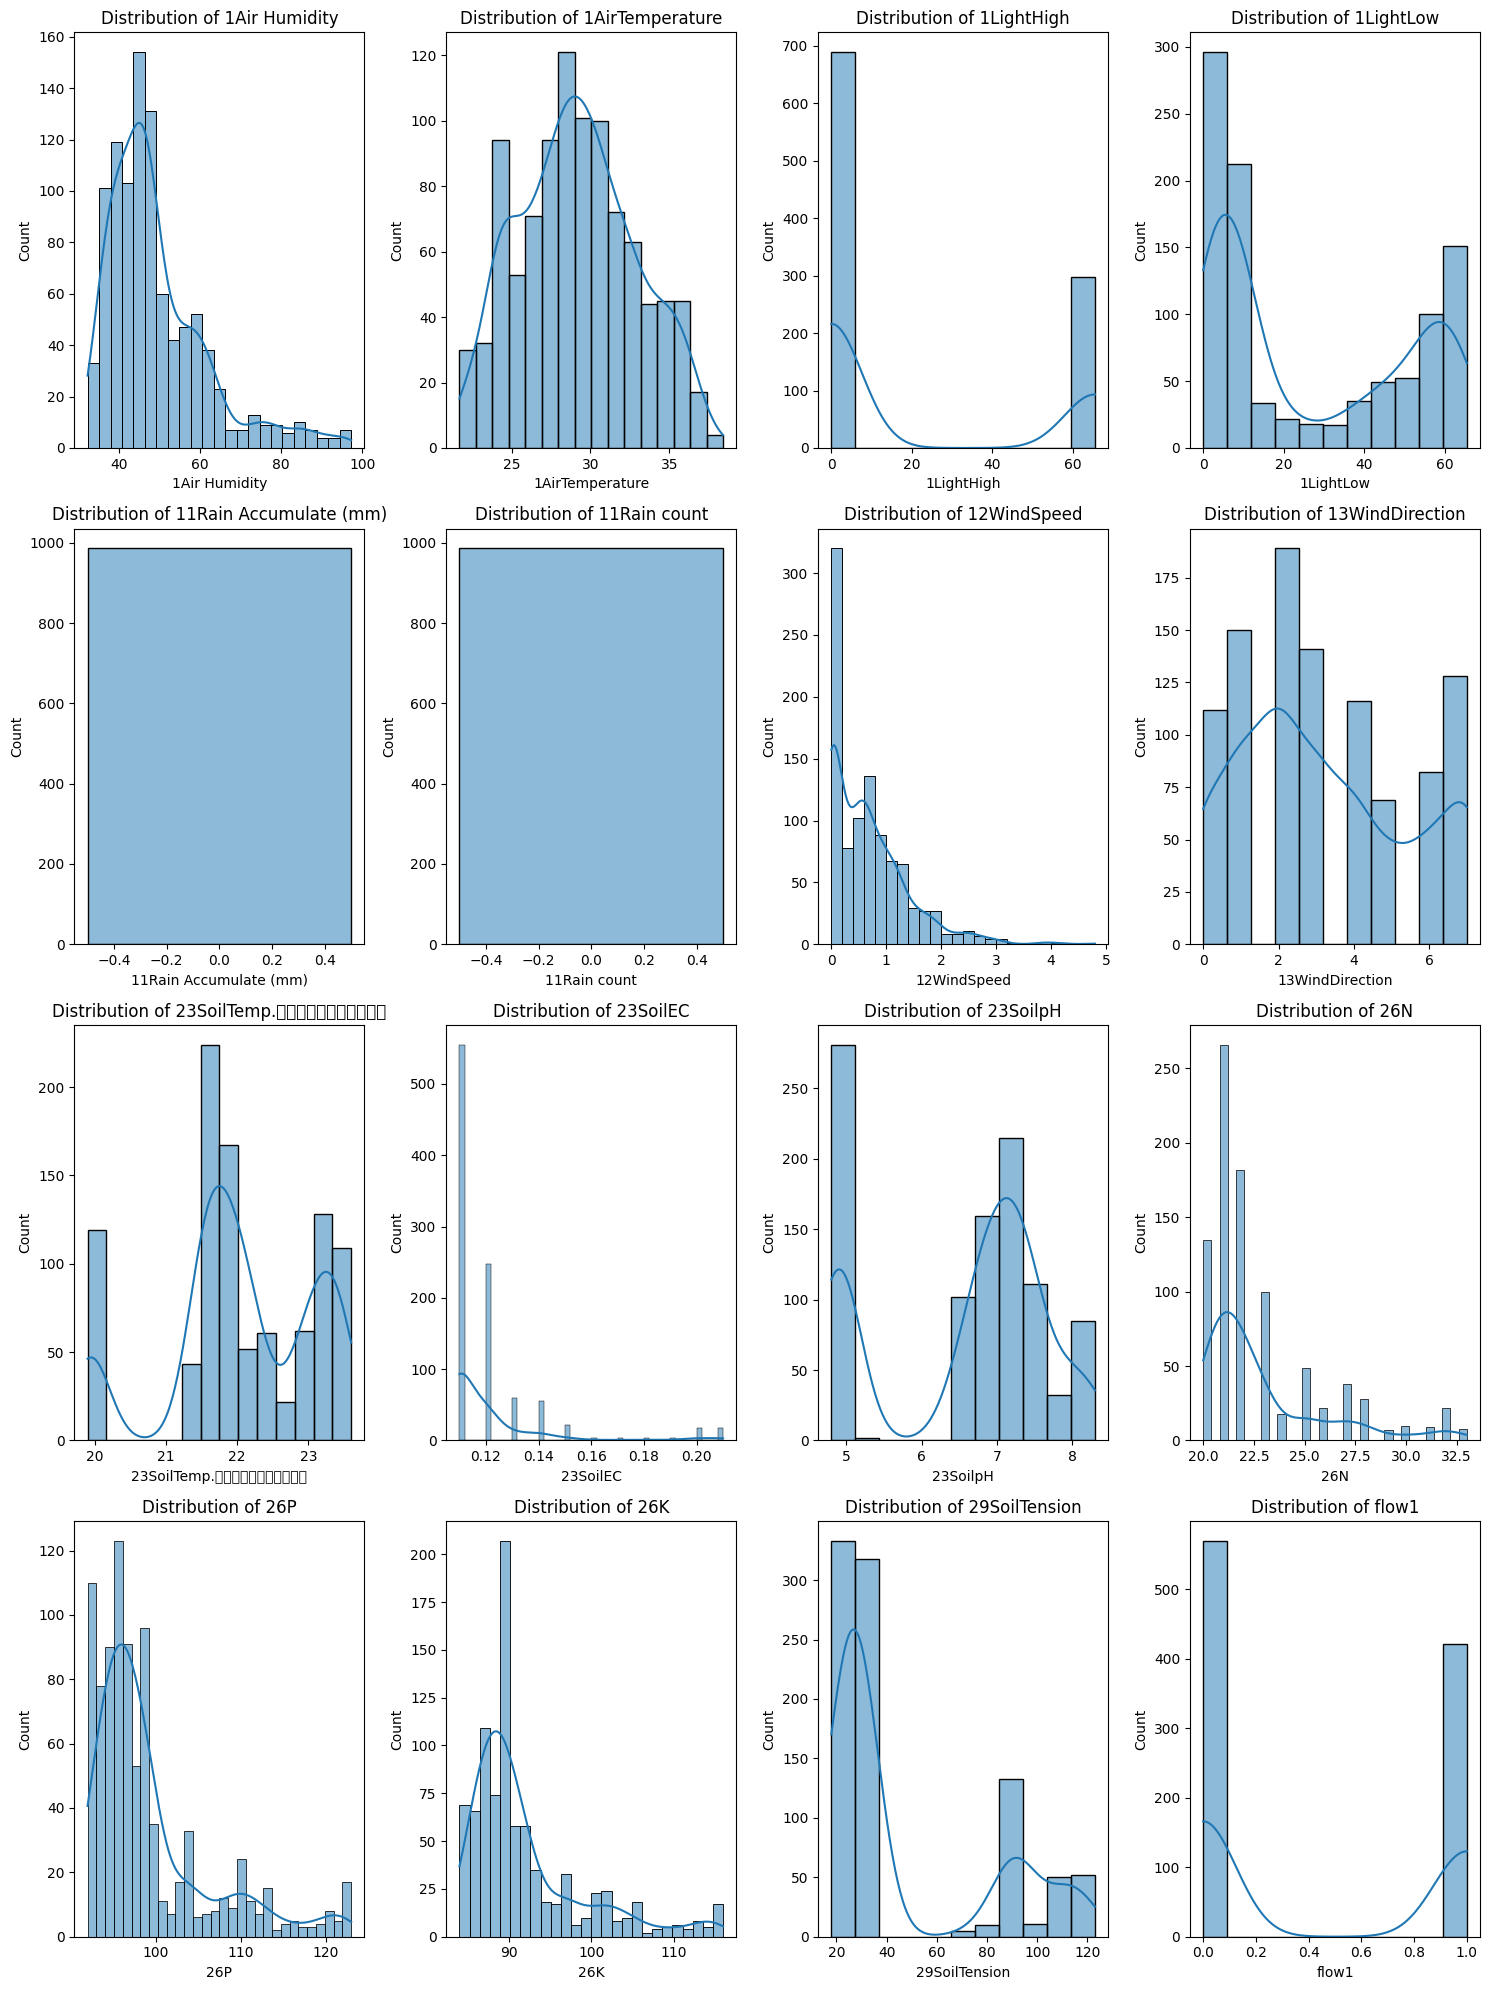

In [266]:
plot_distribution(df_train.drop(['23SoilWC ค.ชื้นดิน'], axis=1))

## Check Missing Values

In [267]:
df_train.isnull().sum()

1Air Humidity              6
1AirTemperature            6
1LightHigh                 6
1LightLow                  6
11Rain Accumulate (mm)     6
11Rain count               6
12WindSpeed                5
13WindDirection            5
23SoilWC ค.ชื้นดิน         5
23SoilTemp.อุณหภูมิดิน     5
23SoilEC                   5
23SoilpH                   5
26N                       98
26P                       98
26K                       98
29SoilTension             80
flow1                      0
dtype: int64

In [268]:
df_test.isnull().sum()

1Air Humidity              0
1AirTemperature            0
1LightHigh                 0
1LightLow                  0
11Rain Accumulate (mm)     0
11Rain count               0
12WindSpeed                0
13WindDirection            0
23SoilTemp.อุณหภูมิดิน     0
23SoilEC                   0
23SoilpH                   0
26N                       21
26P                       21
26K                       21
29SoilTension             17
flow1                      0
dtype: int64

# Data Preparation

## Eliminate outliers

In [269]:
z_scores = (df_train - df_train.mean()) / df_train.std()
outliers = (z_scores > 3) | (z_scores < -3)
df_train = df_train[~outliers.any(axis=1)]
df_train = df_train.reset_index(drop=True)
#Q1 = df_train.quantile(0.25)
#Q3 = df_train.quantile(0.75)
#IQR = Q3 - Q1
#outliers = (df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))
#df_train = df_train[~outliers.any(axis=1)]
#df_train = df_train.reset_index(drop=True)
df_train

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilWC ค.ชื้นดิน,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,85.1,25.9,0.0,29.61,0.0,0.0,0.0,3.0,42.1,23.5,0.12,8.3,23.0,99.0,92.0,22.0,1.0
1,82.8,26.7,0.0,36.30,0.0,0.0,0.0,3.0,44.4,23.5,0.12,8.3,23.0,99.0,92.0,NaN,1.0
2,77.7,27.1,0.0,46.00,0.0,0.0,0.0,7.0,46.4,23.5,0.12,8.3,23.0,100.0,93.0,23.0,1.0
3,75.1,28.1,0.0,46.37,0.0,0.0,0.0,0.0,51.4,23.5,0.12,8.3,23.0,101.0,94.0,23.0,1.0
4,73.0,28.4,0.0,46.63,0.0,0.0,0.0,1.0,57.3,23.5,0.13,8.3,NaN,NaN,NaN,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,43.0,33.0,0.0,52.30,0.0,0.0,1.0,5.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,109.0,0.0
896,42.5,32.5,0.0,53.76,0.0,0.0,0.8,4.0,37.4,22.8,0.11,5.0,21.0,95.0,87.0,NaN,0.0
897,41.7,33.1,0.0,54.86,0.0,0.0,0.8,4.0,37.4,22.8,0.11,5.1,21.0,95.0,87.0,109.0,0.0
898,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,36.9,22.8,0.11,5.0,21.0,95.0,87.0,104.0,0.0


## Eliminate Missing Values

In [270]:
target_train = df_train['23SoilWC ค.ชื้นดิน']
df_train = df_train.drop(['23SoilWC ค.ชื้นดิน'], axis=1)
target_train

0      42.1
1      44.4
2      46.4
3      51.4
4      57.3
       ... 
895    36.9
896    37.4
897    37.4
898    36.9
899    37.4
Name: 23SoilWC ค.ชื้นดิน, Length: 900, dtype: float64

In [271]:
df = [df_train, df_test]
df = pd.concat(df, ignore_index=True)
df

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,85.1,25.9,0.0,29.61,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.0,99.0,92.0,22.0,1.0
1,82.8,26.7,0.0,36.30,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.0,99.0,92.0,NaN,1.0
2,77.7,27.1,0.0,46.00,0.0,0.0,0.0,7.0,23.5,0.12,8.3,23.0,100.0,93.0,23.0,1.0
3,75.1,28.1,0.0,46.37,0.0,0.0,0.0,0.0,23.5,0.12,8.3,23.0,101.0,94.0,23.0,1.0
4,73.0,28.4,0.0,46.63,0.0,0.0,0.0,1.0,23.5,0.13,8.3,NaN,NaN,NaN,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,36.2,35.9,0.0,53.35,0.0,0.0,0.0,3.0,23.7,0.12,4.9,27.0,110.0,103.0,48.0,0.0
1125,39.8,35.9,0.0,54.13,0.0,0.0,1.9,0.0,23.7,0.12,4.9,27.0,110.0,103.0,NaN,0.0
1126,38.4,35.8,0.0,54.11,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,48.0,0.0
1127,38.2,35.6,0.0,54.26,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,45.0,0.0


In [272]:
df.isnull().sum()

1Air Humidity               6
1AirTemperature             6
1LightHigh                  6
1LightLow                   6
11Rain Accumulate (mm)      6
11Rain count                6
12WindSpeed                 5
13WindDirection             5
23SoilTemp.อุณหภูมิดิน      5
23SoilEC                    5
23SoilpH                    5
26N                       114
26P                       114
26K                       114
29SoilTension              88
flow1                       0
dtype: int64

In [273]:
#from sklearn.impute import KNNImputer

#df.fillna(method='ffill', inplace=True)
means = df.mean(numeric_only=True)
df.fillna(means, inplace=True)
#imputer = KNNImputer(n_neighbors=888)
#imputed_array = imputer.fit_transform(df)
#df = pd.DataFrame(imputed_array, columns=df.columns)
df.isnull().sum()

1Air Humidity             0
1AirTemperature           0
1LightHigh                0
1LightLow                 0
11Rain Accumulate (mm)    0
11Rain count              0
12WindSpeed               0
13WindDirection           0
23SoilTemp.อุณหภูมิดิน    0
23SoilEC                  0
23SoilpH                  0
26N                       0
26P                       0
26K                       0
29SoilTension             0
flow1                     0
dtype: int64

In [274]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df[['23SoilEC', '26N', '26K', '26P']])
#df[['23SoilEC', '26N', '26K', '26P']] = pd.DataFrame(df_scaled, columns=['23SoilEC', '26N', '26K', '26P'])
df

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,85.1,25.9,0.0,29.61,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.000000,99.000000,92.000000,22.000000,1.0
1,82.8,26.7,0.0,36.30,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.000000,99.000000,92.000000,43.632085,1.0
2,77.7,27.1,0.0,46.00,0.0,0.0,0.0,7.0,23.5,0.12,8.3,23.000000,100.000000,93.000000,23.000000,1.0
3,75.1,28.1,0.0,46.37,0.0,0.0,0.0,0.0,23.5,0.12,8.3,23.000000,101.000000,94.000000,23.000000,1.0
4,73.0,28.4,0.0,46.63,0.0,0.0,0.0,1.0,23.5,0.13,8.3,22.768473,99.294581,91.923153,23.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,36.2,35.9,0.0,53.35,0.0,0.0,0.0,3.0,23.7,0.12,4.9,27.000000,110.000000,103.000000,48.000000,0.0
1125,39.8,35.9,0.0,54.13,0.0,0.0,1.9,0.0,23.7,0.12,4.9,27.000000,110.000000,103.000000,43.632085,0.0
1126,38.4,35.8,0.0,54.11,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.000000,110.000000,103.000000,48.000000,0.0
1127,38.2,35.6,0.0,54.26,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.000000,110.000000,103.000000,45.000000,0.0


## Divide data

In [275]:
df_train = df[:len(df_train)]
df_train = df_train.reset_index(drop=True)
df_train

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,85.10000,25.900000,0.000000,29.610000,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.000000,99.000000,92.000000,22.000000,1.0
1,82.80000,26.700000,0.000000,36.300000,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.000000,99.000000,92.000000,43.632085,1.0
2,77.70000,27.100000,0.000000,46.000000,0.0,0.0,0.0,7.0,23.5,0.12,8.3,23.000000,100.000000,93.000000,23.000000,1.0
3,75.10000,28.100000,0.000000,46.370000,0.0,0.0,0.0,0.0,23.5,0.12,8.3,23.000000,101.000000,94.000000,23.000000,1.0
4,73.00000,28.400000,0.000000,46.630000,0.0,0.0,0.0,1.0,23.5,0.13,8.3,22.768473,99.294581,91.923153,23.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,43.00000,33.000000,0.000000,52.300000,0.0,0.0,1.0,5.0,22.8,0.11,5.0,21.000000,95.000000,87.000000,109.000000,0.0
896,42.50000,32.500000,0.000000,53.760000,0.0,0.0,0.8,4.0,22.8,0.11,5.0,21.000000,95.000000,87.000000,43.632085,0.0
897,41.70000,33.100000,0.000000,54.860000,0.0,0.0,0.8,4.0,22.8,0.11,5.1,21.000000,95.000000,87.000000,109.000000,0.0
898,47.49537,29.799644,22.290703,27.546625,0.0,0.0,0.0,2.0,22.8,0.11,5.0,21.000000,95.000000,87.000000,104.000000,0.0


In [276]:
df_test = df[len(df_train):]
df_test = df_test.reset_index(drop=True)
df_test

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,46.2,30.7,65.53,8.79,0.0,0.0,1.3,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.000000,0.0
1,46.0,31.4,65.53,8.26,0.0,0.0,0.0,1.0,22.4,0.11,7.9,21.0,95.0,88.0,26.000000,0.0
2,44.4,32.2,65.53,8.66,0.0,0.0,1.0,2.0,22.3,0.11,7.9,21.0,95.0,88.0,43.632085,0.0
3,43.0,33.0,65.53,8.68,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.000000,0.0
4,42.4,32.9,65.53,8.86,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,36.2,35.9,0.00,53.35,0.0,0.0,0.0,3.0,23.7,0.12,4.9,27.0,110.0,103.0,48.000000,0.0
225,39.8,35.9,0.00,54.13,0.0,0.0,1.9,0.0,23.7,0.12,4.9,27.0,110.0,103.0,43.632085,0.0
226,38.4,35.8,0.00,54.11,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,48.000000,0.0
227,38.2,35.6,0.00,54.26,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,45.000000,0.0


## Feature Selection

In [277]:
df_train['23SoilWC ค.ชื้นดิน'] = target_train
df_train.isnull().sum()

1Air Humidity             0
1AirTemperature           0
1LightHigh                0
1LightLow                 0
11Rain Accumulate (mm)    0
11Rain count              0
12WindSpeed               0
13WindDirection           0
23SoilTemp.อุณหภูมิดิน    0
23SoilEC                  0
23SoilpH                  0
26N                       0
26P                       0
26K                       0
29SoilTension             0
flow1                     0
23SoilWC ค.ชื้นดิน        5
dtype: int64

In [278]:
df_train = df_train.dropna()
df_train.isnull().sum()
#means = df_train.mean(numeric_only=True)
#df_train.fillna(means, inplace=True)
#df_train.isnull().sum()

1Air Humidity             0
1AirTemperature           0
1LightHigh                0
1LightLow                 0
11Rain Accumulate (mm)    0
11Rain count              0
12WindSpeed               0
13WindDirection           0
23SoilTemp.อุณหภูมิดิน    0
23SoilEC                  0
23SoilpH                  0
26N                       0
26P                       0
26K                       0
29SoilTension             0
flow1                     0
23SoilWC ค.ชื้นดิน        0
dtype: int64

In [279]:
df_train = df_train.reset_index(drop=True)
df_train

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1,23SoilWC ค.ชื้นดิน
0,85.10000,25.900000,0.000000,29.610000,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.000000,99.000000,92.000000,22.000000,1.0,42.1
1,82.80000,26.700000,0.000000,36.300000,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.000000,99.000000,92.000000,43.632085,1.0,44.4
2,77.70000,27.100000,0.000000,46.000000,0.0,0.0,0.0,7.0,23.5,0.12,8.3,23.000000,100.000000,93.000000,23.000000,1.0,46.4
3,75.10000,28.100000,0.000000,46.370000,0.0,0.0,0.0,0.0,23.5,0.12,8.3,23.000000,101.000000,94.000000,23.000000,1.0,51.4
4,73.00000,28.400000,0.000000,46.630000,0.0,0.0,0.0,1.0,23.5,0.13,8.3,22.768473,99.294581,91.923153,23.000000,1.0,57.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,43.00000,33.000000,0.000000,52.300000,0.0,0.0,1.0,5.0,22.8,0.11,5.0,21.000000,95.000000,87.000000,109.000000,0.0,36.9
891,42.50000,32.500000,0.000000,53.760000,0.0,0.0,0.8,4.0,22.8,0.11,5.0,21.000000,95.000000,87.000000,43.632085,0.0,37.4
892,41.70000,33.100000,0.000000,54.860000,0.0,0.0,0.8,4.0,22.8,0.11,5.1,21.000000,95.000000,87.000000,109.000000,0.0,37.4
893,47.49537,29.799644,22.290703,27.546625,0.0,0.0,0.0,2.0,22.8,0.11,5.0,21.000000,95.000000,87.000000,104.000000,0.0,36.9


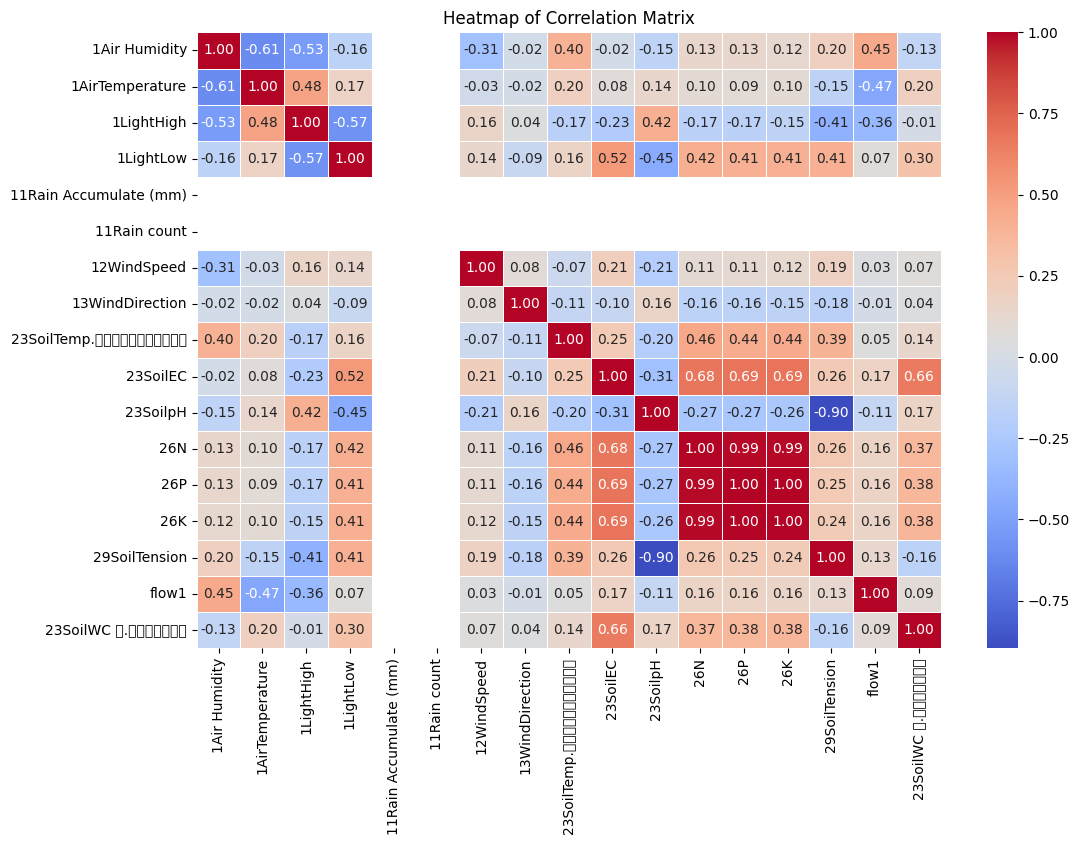

In [280]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

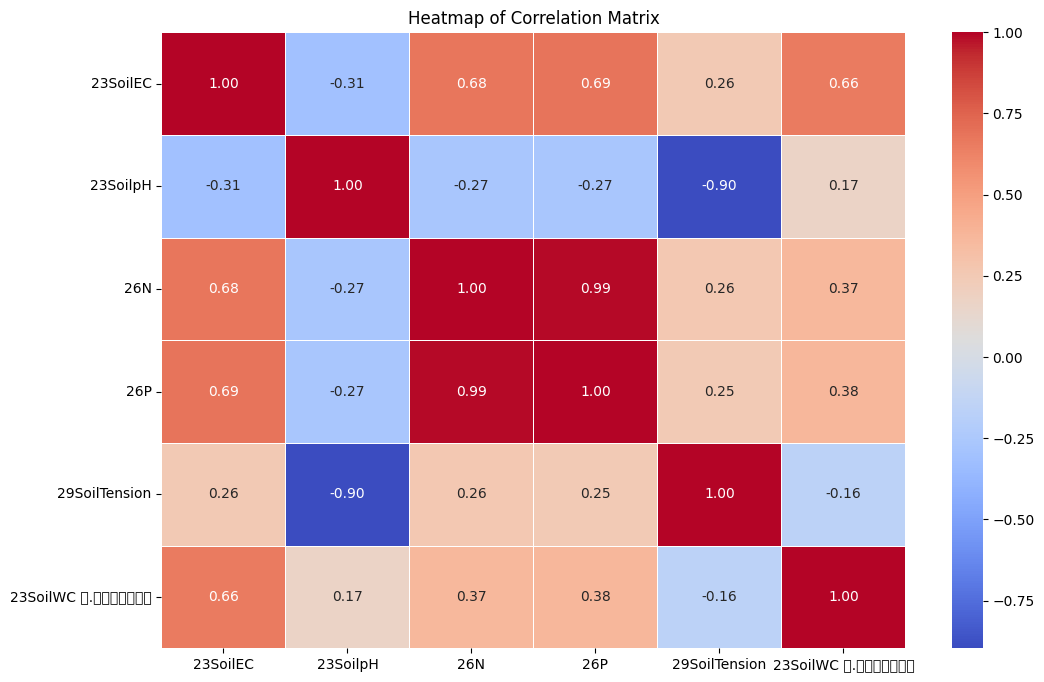

In [281]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_train[['23SoilEC', '23SoilpH', '26N', '26P', '29SoilTension', '23SoilWC ค.ชื้นดิน']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [282]:
target_train = df_train['23SoilWC ค.ชื้นดิน']
df_train = df_train.drop(['23SoilWC ค.ชื้นดิน'], axis=1)
target_train

0      42.1
1      44.4
2      46.4
3      51.4
4      57.3
       ... 
890    36.9
891    37.4
892    37.4
893    36.9
894    37.4
Name: 23SoilWC ค.ชื้นดิน, Length: 895, dtype: float64

# Modeling

## Pycaret

In [283]:
!pip install --upgrade scikit-learn
!pip install pycaret

ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 34.9/36.4 MB 85.6 MB/s eta 0:00:01ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 34.9/36.4 MB 85.6 MB/s eta 0:00:01


In [31]:
!pip install --upgrade scipy

In [369]:
from pycaret.regression import *

reg = setup(data=df_train[['23SoilEC', '23SoilpH', '26N', '26P', '29SoilTension']], target=target_train, train_size=0.9, session_id=888)

,Description,Value
0,Session id,888
1,Target,23SoilWC ค.ชื้นดิน
2,Target type,Regression
3,Original data shape,"(895, 6)"
4,Transformed data shape,"(895, 6)"
5,Transformed train set shape,"(805, 6)"
6,Transformed test set shape,"(90, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [370]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [371]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.5629,7.2137,2.6264,0.9472,0.0539,0.0348,0.2330
xgboost,Extreme Gradient Boosting,1.6151,7.6196,2.7202,0.9445,0.0564,0.0359,0.1070
et,Extra Trees Regressor,1.6137,8.3127,2.8315,0.9392,0.0575,0.0357,0.1770
lightgbm,Light Gradient Boosting Machine,1.8165,8.4798,2.8651,0.9377,0.0589,0.0408,0.2020
dt,Decision Tree Regressor,1.7265,9.3290,3.0407,0.9310,0.0628,0.0385,0.0240
gbr,Gradient Boosting Regressor,2.1411,10.9710,3.2601,0.9200,0.0667,0.0481,0.1820
ada,AdaBoost Regressor,3.4917,21.7318,4.6062,0.8418,0.0997,0.0828,0.0540
knn,K Neighbors Regressor,3.5926,43.4431,6.5158,0.6838,0.1314,0.0799,0.0320
lr,Linear Regression,5.9077,61.8152,7.8434,0.5441,0.1621,0.1367,0.6090
lar,Least Angle Regression,6.4475,75.5586,8.4742,0.4463,0.1837,0.1498,0.0440


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [377]:
tuned_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.4684,7.1872,2.6809,0.9485,0.0494,0.0312
1,1.6603,9.1239,3.0206,0.9315,0.0582,0.0360
2,1.9731,14.4090,3.7959,0.8908,0.0743,0.0435
3,1.7422,9.7269,3.1188,0.9308,0.0583,0.0368
4,1.1152,3.6297,1.9052,0.9657,0.0475,0.0275
5,1.5330,8.4703,2.9104,0.9185,0.0543,0.0327
6,1.8843,9.8097,3.1320,0.9495,0.0577,0.0392
7,1.8418,10.0374,3.1682,0.9374,0.0716,0.0412
8,1.2464,3.8039,1.9504,0.9751,0.0478,0.0308


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [378]:
predictions = predict_model(tuned_model, data=df_test)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.7826,5.9255,2.4342,0.9395,0.0617,0.0475


,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1,23SoilWC ค.ชื้นดิน,prediction_label
0,46.200001,30.700001,65.529999,8.790000,0.0,0.0,1.3,2.0,22.400000,0.11,7.9,21.0,95.0,88.0,26.000000,0.0,33.754189,31.6890
1,46.000000,31.400000,65.529999,8.260000,0.0,0.0,0.0,1.0,22.400000,0.11,7.9,21.0,95.0,88.0,26.000000,0.0,33.754189,31.6890
2,44.400002,32.200001,65.529999,8.660000,0.0,0.0,1.0,2.0,22.299999,0.11,7.9,21.0,95.0,88.0,43.632084,0.0,33.603199,31.9800
3,43.000000,33.000000,65.529999,8.680000,0.0,0.0,0.0,2.0,22.400000,0.11,7.9,21.0,95.0,88.0,26.000000,0.0,33.754189,31.6890
4,42.400002,32.900002,65.529999,8.860000,0.0,0.0,0.0,2.0,22.400000,0.11,7.9,21.0,95.0,88.0,26.000000,0.0,33.754189,31.6890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,36.200001,35.900002,0.000000,53.349998,0.0,0.0,0.0,3.0,23.700001,0.12,4.9,27.0,110.0,103.0,48.000000,0.0,37.097916,41.9215
225,39.799999,35.900002,0.000000,54.130001,0.0,0.0,1.9,0.0,23.700001,0.12,4.9,27.0,110.0,103.0,43.632084,0.0,37.097916,42.3445
226,38.400002,35.799999,0.000000,54.110001,0.0,0.0,0.0,1.0,23.700001,0.12,4.9,27.0,110.0,103.0,48.000000,0.0,37.097916,41.9215
227,38.200001,35.599998,0.000000,54.259998,0.0,0.0,0.0,1.0,23.700001,0.12,4.9,27.0,110.0,103.0,45.000000,0.0,37.097916,42.4595


### Submission

In [379]:
df_submit = pd.read_csv('/content/sample_submission.csv')
df_submit

,index,23SoilWC ค.ชื้นดิน
0,02_1,31.1
1,02_2,NaN
2,02_3,NaN
3,02_4,NaN
4,02_5,NaN
...,...,...
224,09_112,NaN
225,09_113,NaN
226,09_114,NaN
227,09_115,NaN


In [380]:
predictions['prediction_label']

0      31.6890
1      31.6890
2      31.9800
3      31.6890
4      31.6890
        ...   
224    41.9215
225    42.3445
226    41.9215
227    42.4595
228    41.9215
Name: prediction_label, Length: 229, dtype: float64

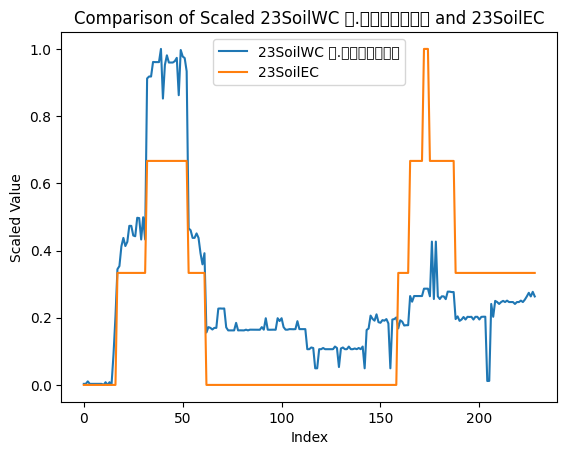

In [381]:
from sklearn.preprocessing import MinMaxScaler

df_test.loc[:, '23SoilWC ค.ชื้นดิน'] = predictions['prediction_label']

scaler = MinMaxScaler()
scaled_soil_wc = scaler.fit_transform(df_test[['23SoilWC ค.ชื้นดิน']])
scaled_soil_ec = scaler.fit_transform(df_test[['23SoilEC']])

plt.plot(scaled_soil_wc, label='23SoilWC ค.ชื้นดิน')
plt.plot(scaled_soil_ec, label='23SoilEC')

plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.title('Comparison of Scaled 23SoilWC ค.ชื้นดิน and 23SoilEC')
plt.legend()

plt.show()

In [382]:
df_submit['23SoilWC ค.ชื้นดิน'] = predictions['prediction_label']
df_submit

,index,23SoilWC ค.ชื้นดิน
0,02_1,31.6890
1,02_2,31.6890
2,02_3,31.9800
3,02_4,31.6890
4,02_5,31.6890
...,...,...
224,09_112,41.9215
225,09_113,42.3445
226,09_114,41.9215
227,09_115,42.4595


In [383]:
df_submit.to_csv('/content/ExtraTreesRegressor_Auto_Outlier_Fx888.csv', index=False)

## Autogluon

In [37]:
df_train['23SoilWC ค.ชื้นดิน'] = target_train
df_train

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1,23SoilWC ค.ชื้นดิน
0,85.100000,25.900000,0.000000,29.610000,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.000000,99.000000,92.000000,22.000000,1.0,42.1
1,82.800000,26.700000,0.000000,36.300000,0.0,0.0,0.0,3.0,23.5,0.12,8.3,23.000000,99.000000,92.000000,42.072727,1.0,44.4
2,77.700000,27.100000,0.000000,46.000000,0.0,0.0,0.0,7.0,23.5,0.12,8.3,23.000000,100.000000,93.000000,23.000000,1.0,46.4
3,75.100000,28.100000,0.000000,46.370000,0.0,0.0,0.0,0.0,23.5,0.12,8.3,23.000000,101.000000,94.000000,23.000000,1.0,51.4
4,73.000000,28.400000,0.000000,46.630000,0.0,0.0,0.0,1.0,23.5,0.13,8.3,22.579323,98.816399,91.454545,23.000000,1.0,57.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,43.000000,33.000000,0.000000,52.300000,0.0,0.0,1.0,5.0,22.8,0.11,5.0,21.000000,95.000000,87.000000,109.000000,0.0,36.9
1013,42.500000,32.500000,0.000000,53.760000,0.0,0.0,0.8,4.0,22.8,0.11,5.0,21.000000,95.000000,87.000000,42.072727,0.0,37.4
1014,41.700000,33.100000,0.000000,54.860000,0.0,0.0,0.8,4.0,22.8,0.11,5.1,21.000000,95.000000,87.000000,109.000000,0.0,37.4
1015,48.064839,29.079355,23.358274,26.745782,0.0,0.0,0.0,2.0,22.8,0.11,5.0,21.000000,95.000000,87.000000,104.000000,0.0,36.9


In [38]:
df_test

,1Air Humidity,1AirTemperature,1LightHigh,1LightLow,11Rain Accumulate (mm),11Rain count,12WindSpeed,13WindDirection,23SoilTemp.อุณหภูมิดิน,23SoilEC,23SoilpH,26N,26P,26K,29SoilTension,flow1
0,46.2,30.7,65.53,8.79,0.0,0.0,1.3,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.000000,0.0
1,46.0,31.4,65.53,8.26,0.0,0.0,0.0,1.0,22.4,0.11,7.9,21.0,95.0,88.0,26.000000,0.0
2,44.4,32.2,65.53,8.66,0.0,0.0,1.0,2.0,22.3,0.11,7.9,21.0,95.0,88.0,42.072727,0.0
3,43.0,33.0,65.53,8.68,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.000000,0.0
4,42.4,32.9,65.53,8.86,0.0,0.0,0.0,2.0,22.4,0.11,7.9,21.0,95.0,88.0,26.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,36.2,35.9,0.00,53.35,0.0,0.0,0.0,3.0,23.7,0.12,4.9,27.0,110.0,103.0,48.000000,0.0
225,39.8,35.9,0.00,54.13,0.0,0.0,1.9,0.0,23.7,0.12,4.9,27.0,110.0,103.0,42.072727,0.0
226,38.4,35.8,0.00,54.11,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,48.000000,0.0
227,38.2,35.6,0.00,54.26,0.0,0.0,0.0,1.0,23.7,0.12,4.9,27.0,110.0,103.0,45.000000,0.0


In [39]:
df_train[['23SoilEC', '23SoilpH', '26N', '26P', '29SoilTension', '23SoilWC ค.ชื้นดิน']].to_csv('train_data.csv', index=False)
df_test[['23SoilEC', '23SoilpH', '26N', '26P', '29SoilTension']].to_csv('test_data.csv', index=False)

In [40]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 773.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [49]:
from autogluon.tabular import TabularDataset, TabularPredictor

train_data = 'train_data.csv'
test_data = 'test_data.csv'

train_df = TabularDataset(train_data)
test_df = TabularDataset(test_data)

predictor = TabularPredictor(label='23SoilWC ค.ชื้นดิน').fit(train_df)

Loaded data from: train_data.csv | Columns = 6 / 6 | Rows = 1012 -> 1012
Loaded data from: test_data.csv | Columns = 5 / 5 | Rows = 229 -> 229
No path specified. Models will be saved in: "AutogluonModels/ag-20240224_182428"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240224_182428"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Vers

[1000]	valid_set's rmse: 3.43548
[2000]	valid_set's rmse: 3.19022
[3000]	valid_set's rmse: 3.09221
[4000]	valid_set's rmse: 3.05801
[5000]	valid_set's rmse: 3.04935
[6000]	valid_set's rmse: 3.03272
[7000]	valid_set's rmse: 3.02828
[8000]	valid_set's rmse: 3.01482
[9000]	valid_set's rmse: 3.01533
[10000]	valid_set's rmse: 3.01193


	-3.0114	 = Validation score   (-root_mean_squared_error)
	6.14s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: LightGBM ...
	-2.8986	 = Validation score   (-root_mean_squared_error)
	7.87s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.6791	 = Validation score   (-root_mean_squared_error)
	3.0s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: CatBoost ...
	-2.8136	 = Validation score   (-root_mean_squared_error)
	4.05s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-2.9161	 = Validation score   (-root_mean_squared_error)
	1.6s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.9586	 = Validation score   (-root_mean_squared_error)
	3.48s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	-2.8427	 = Validation score   (-root_mean_squared_error)
	0.62s	 = Training   runtime
	0.01s	 = Validation runtime
Fitti

In [50]:
predictions = predictor.predict(test_df)
predictions

0      35.199726
1      35.199726
2      33.809872
3      35.199726
4      35.199726
         ...    
224    37.363682
225    37.369484
226    37.363682
227    37.363705
228    37.363682
Name: 23SoilWC ค.ชื้นดิน, Length: 229, dtype: float32

## Extra Trees Set2

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train, target_train, test_size = 0.1, random_state = 88)
print("The shape of X_train is:", X_train.shape)
print("The shape of X_val is:", X_val.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_val is:", y_val.shape)

The shape of X_train is: (805, 16)
The shape of X_val is: (90, 16)
The shape of y_train is: (805,)
The shape of y_val is: (90,)


In [364]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error

extratrees = ExtraTreesRegressor(n_estimators=250, random_state=88)
extratrees = RFE(estimator=extratrees, n_features_to_select=5, step=5)
#extratrees = RFECV(extratrees, step=5, cv=10)
extratrees.fit(X_train, y_train)
y_extratrees = extratrees.predict(X_val)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, y_extratrees))

# from sklearn.ensemble import RandomForestRegressor, StackingRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import mean_absolute_error

# estimator = [
#     ('rf', RandomForestRegressor(n_estimators=300, max_depth=15, criterion='absolute_error')),
#     ('lgbm', LGBMRegressor(num_leaves=31, learning_rate=0.1)),
# ]
# stack1 = StackingRegressor(estimators=estimator, final_estimator=ExtraTreesRegressor(n_estimators=300, max_depth=15))
# #stack1 = RFE(estimator=stack1, n_features_to_select=5, step=5)
# stack1.fit(X_train, y_train)

# y_valid_hat = stack1.predict(X_val)
# mae = mean_absolute_error(y_val, y_valid_hat)
# print("Mean Absolute Error:", mae)

Mean Absolute Error (MAE): 1.7241831297097823


In [354]:
X_train.columns[extratrees.support_]

Index(['23SoilEC', '23SoilpH', '26N', '26P', '29SoilTension'], dtype='object')

In [335]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(extratrees, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
mae_scores = -scores
mean_mae = mae_scores.mean()
print("Mean Absolute Error (MAE) across all folds:", scores)

KeyboardInterrupt: 

### Submission

In [365]:
df_submit = pd.read_csv('/content/sample_submission.csv')
df_submit

,index,23SoilWC ค.ชื้นดิน
0,02_1,31.1
1,02_2,NaN
2,02_3,NaN
3,02_4,NaN
4,02_5,NaN
...,...,...
224,09_112,NaN
225,09_113,NaN
226,09_114,NaN
227,09_115,NaN


In [366]:
y_pred = extratrees.predict(df_test.drop(['23SoilWC ค.ชื้นดิน'], axis=1))
df_submit.loc[:, '23SoilWC ค.ชื้นดิน'] = y_pred
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_submit)

      index  23SoilWC ค.ชื้นดิน
0      02_1              31.834
1      02_2              31.834
2      02_3              31.939
3      02_4              31.834
4      02_5              31.834
5      02_6              31.834
6      02_7              31.834
7      02_8              31.834
8      02_9              31.834
9     02_10              31.834
10    02_11              31.430
11    02_12              32.060
12    02_13              31.430
13    02_14              32.060
14    02_15              31.430
15    02_16              35.743
16    02_17              39.691
17    02_18              41.931
18    02_19              44.548
19    02_20              47.540
20    02_21              48.126
21    02_22              47.890
22    02_23              48.172
23    02_24              49.495
24    02_25              49.495
25    02_26              49.239
26    02_27              49.295
27    02_28              49.601
28    02_29              49.674
29    02_30              46.226
30    02

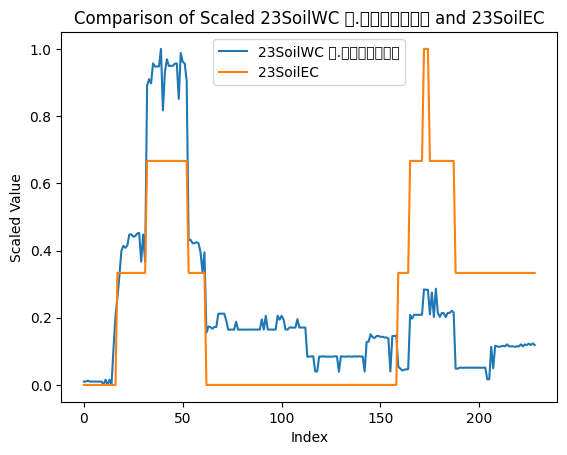

In [367]:
from sklearn.preprocessing import MinMaxScaler

df_test.loc[:, '23SoilWC ค.ชื้นดิน'] = y_pred

scaler = MinMaxScaler()
scaled_soil_wc = scaler.fit_transform(df_test[['23SoilWC ค.ชื้นดิน']])
scaled_soil_ec = scaler.fit_transform(df_test[['23SoilEC']])

plt.plot(scaled_soil_wc, label='23SoilWC ค.ชื้นดิน')
plt.plot(scaled_soil_ec, label='23SoilEC')

plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.title('Comparison of Scaled 23SoilWC ค.ชื้นดิน and 23SoilEC')
plt.legend()

plt.show()

In [258]:
df_old = pd.read_csv('/content/ExtraTreesRegressor_Mean_Outlier_estimators500_Fx8888.csv')
df_old

,index,23SoilWC ค.ชื้นดิน
0,02_1,32.033829
1,02_2,32.033829
2,02_3,31.897200
3,02_4,32.033829
4,02_5,32.033829
...,...,...
224,09_112,40.766000
225,09_113,41.294800
226,09_114,40.766000
227,09_115,41.052000


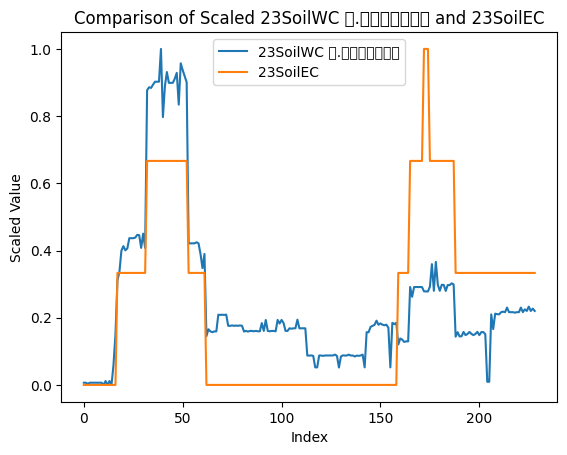

In [259]:
from sklearn.preprocessing import MinMaxScaler

df_old.loc[:, '23SoilEC']= df_test[['23SoilEC']]

scaler = MinMaxScaler()
scaled_soil_wc = scaler.fit_transform(df_old[['23SoilWC ค.ชื้นดิน']])
scaled_soil_ec = scaler.fit_transform(df_old[['23SoilEC']])

plt.plot(scaled_soil_wc, label='23SoilWC ค.ชื้นดิน')
plt.plot(scaled_soil_ec, label='23SoilEC')

plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.title('Comparison of Scaled 23SoilWC ค.ชื้นดิน and 23SoilEC')
plt.legend()

plt.show()

In [107]:
df_submit

,index,23SoilWC ค.ชื้นดิน
0,02_1,31.4652
1,02_2,31.4652
2,02_3,31.9472
3,02_4,31.4652
4,02_5,31.4652
...,...,...
224,09_112,37.2002
225,09_113,38.0830
226,09_114,37.2002
227,09_115,38.4710


## Extra Trees Set9

In [167]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train[['23SoilEC', '1AirTemperature', '26N', '26P', '29SoilTension']], target_train, test_size = 0.1, random_state = 888)
print("The shape of X_train is:", X_train.shape)
print("The shape of X_val is:", X_val.shape)
print("The shape of y_train is:", y_train.shape)
print("The shape of y_val is:", y_val.shape)

The shape of X_train is: (805, 5)
The shape of X_val is: (90, 5)
The shape of y_train is: (805,)
The shape of y_val is: (90,)


In [168]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error

extratrees = ExtraTreesRegressor(n_estimators=250, random_state=888)
#extratrees = RFE(estimator=extratrees, n_features_to_select=5, step=5)
#extratrees = RFECV(extratrees, step=5, cv=10)
extratrees.fit(X_train, y_train)
y_extratrees = extratrees.predict(X_val)
print("Mean Absolute Error (MAE):", mean_absolute_error(y_val, y_extratrees))
#from sklearn.ensemble import RandomForestRegressor, StackingRegressor
#from lightgbm import LGBMRegressor
#from sklearn.metrics import mean_absolute_error

#estimator=[('rf', RandomForestRegressor(criterion = 'absolute_error')), ('lgbm', LGBMRegressor(force_col_wise=True))
#]
#stack1 = StackingRegressor(estimators=estimator,
#                          final_estimator=ExtraTreesRegressor(n_estimators = 300,criterion = 'absolute_error'))
#stack1.fit(X_train, y_train)
#y_valid_hat = stack1.predict(X_val)
#mae = mean_absolute_error(y_val, y_valid_hat)
#print("Mean Absolute Error:", mae)

Mean Absolute Error (MAE): 1.9065970370369985


In [169]:
X_train.columns[extratrees.support_]

AttributeError: 'ExtraTreesRegressor' object has no attribute 'support_'

In [834]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(extratrees, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
mae_scores = -scores
mean_mae = mae_scores.mean()
print("Mean Absolute Error (MAE) across all folds:", mean_mae)

Mean Absolute Error (MAE) across all folds: 3.3002418697799185


### Submission

In [1448]:
y_pred = stack1.predict(df_test[['23SoilEC', '1AirTemperature', '26N', '26P', '29SoilTension']])
df_submit.loc[113:, '23SoilWC ค.ชื้นดิน'] = y_pred
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_submit)

      index  23SoilWC ค.ชื้นดิน
0      02_1              31.669
1      02_2              31.669
2      02_3              31.958
3      02_4              31.669
4      02_5              31.669
5      02_6              31.669
6      02_7              31.669
7      02_8              31.669
8      02_9              31.669
9     02_10              31.669
10    02_11              31.445
11    02_12              31.886
12    02_13              31.445
13    02_14              31.886
14    02_15              31.445
15    02_16              35.575
16    02_17              39.544
17    02_18              43.155
18    02_19              44.008
19    02_20              47.730
20    02_21              48.846
21    02_22              47.839
22    02_23              48.274
23    02_24              49.686
24    02_25              49.686
25    02_26              49.355
26    02_27              49.168
27    02_28              50.226
28    02_29              50.029
29    02_30              44.810
30    02

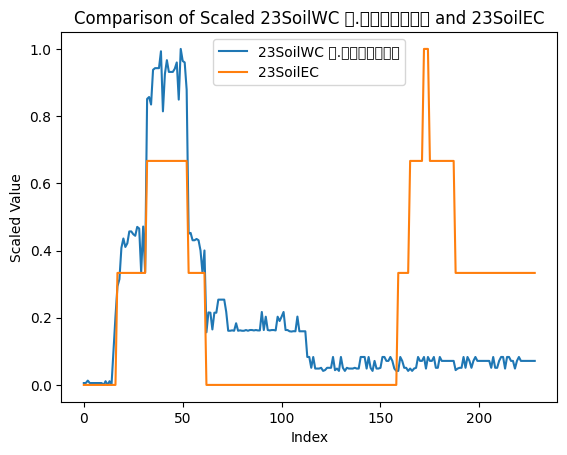

In [1449]:
from sklearn.preprocessing import MinMaxScaler

df_test2 = [df_test02, df_test09]
df_test2 = pd.concat(df_test2, ignore_index=True)
df_test2 = df_test2.drop(['index'], axis=1)
df_test2 = df_test2.drop(['time'], axis=1)
df_test2.loc[:, '23SoilWC ค.ชื้นดิน'] = df_submit.loc[:, '23SoilWC ค.ชื้นดิน']

scaler = MinMaxScaler()
scaled_soil_wc = scaler.fit_transform(df_test2[['23SoilWC ค.ชื้นดิน']])
scaled_soil_ec = scaler.fit_transform(df_test2[['23SoilEC']])

plt.plot(scaled_soil_wc, label='23SoilWC ค.ชื้นดิน')
plt.plot(scaled_soil_ec, label='23SoilEC')

plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.title('Comparison of Scaled 23SoilWC ค.ชื้นดิน and 23SoilEC')
plt.legend()

plt.show()

In [1290]:
df_old = pd.read_csv('/content/ExtraTreesRegressor_Outlier_estimators300_Fx888.csv')
df_old

,index,23SoilWC ค.ชื้นดิน
0,02_1,31.558667
1,02_2,31.558667
2,02_3,31.958000
3,02_4,31.558667
4,02_5,31.558667
...,...,...
224,09_112,36.825333
225,09_113,37.056667
226,09_114,36.825333
227,09_115,36.903000


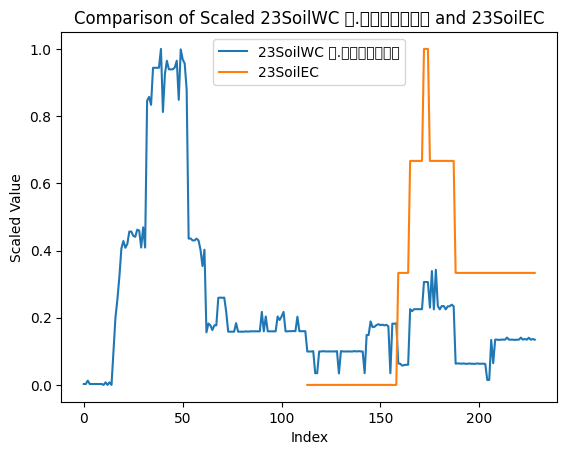

In [1291]:
from sklearn.preprocessing import MinMaxScaler

df_old.loc[113:, '23SoilEC']= df_test2[['23SoilEC']]

scaler = MinMaxScaler()
scaled_soil_wc = scaler.fit_transform(df_old[['23SoilWC ค.ชื้นดิน']])
scaled_soil_ec = scaler.fit_transform(df_old[['23SoilEC']])

plt.plot(scaled_soil_wc, label='23SoilWC ค.ชื้นดิน')
plt.plot(scaled_soil_ec, label='23SoilEC')

plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.title('Comparison of Scaled 23SoilWC ค.ชื้นดิน and 23SoilEC')
plt.legend()

plt.show()

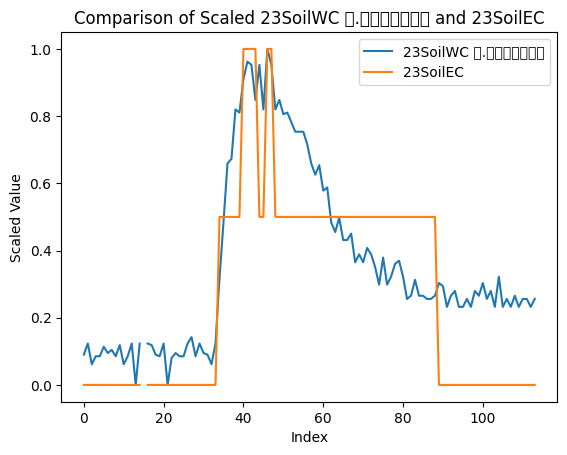

In [216]:
scaler = MinMaxScaler()
scaled_soil_10 = scaler.fit_transform(df_train12[['23SoilWC ค.ชื้นดิน']])
scaled_soil_10_2 = scaler.fit_transform(df_train12[['23SoilEC']])
#scaled_soil_12 = scaler.fit_transform(df_train12[['23SoilWC ค.ชื้นดิน']])

plt.plot(scaled_soil_10, label='23SoilWC ค.ชื้นดิน')
plt.plot(scaled_soil_10_2, label='23SoilEC')
#plt.plot(scaled_soil_12, label='23SoilWC ค.ชื้นดิน12')

plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.title('Comparison of Scaled 23SoilWC ค.ชื้นดิน and 23SoilEC')
plt.legend()

plt.show()

In [368]:
df_submit.to_csv('/content/ExtraTreesRegressor_Mean_Outlier_estimators250_Fx88.csv', index=False)

## Compare Model

100%|██████████| 110/110 [1:42:01<00:00, 55.65s/it]


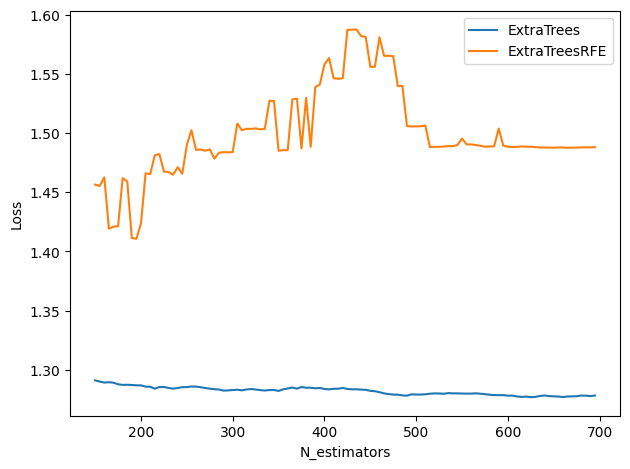

In [1411]:
from tqdm import tqdm

cross_et = []
cross_etrfe = []
esti = range(150, 700, 5)

for i in tqdm(esti):
    extratrees = ExtraTreesRegressor(n_estimators=i, random_state=888)
    scores_et = -cross_val_score(extratrees, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    cross_et.append(np.mean(scores_et))

    extratrees_rfe = ExtraTreesRegressor(n_estimators=i, random_state=888)
    extratrees_rfe = RFE(estimator=extratrees_rfe, n_features_to_select=5, step=6)
    scores_etrfe = -cross_val_score(extratrees_rfe, X_train, y_train, scoring='neg_mean_absolute_error', cv=10)
    cross_etrfe.append(np.mean(scores_etrfe))

plt.plot(esti, cross_et, label='ExtraTrees')
plt.plot(esti, cross_etrfe, label='ExtraTreesRFE')
plt.xlabel('N_estimators')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()